In [1]:
# install packages
import sys

!conda install --yes --prefix {sys.prefix} numpy scipy pandas matplotlib seaborn pydotplus

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.9
  latest version: 4.5.12

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



# Introduction to Scikit-learn
In this lab, we will go through how to use scikit-learn to build ML models, including linear regression, logistic regression, KNN, decision tree and random forest. Also, we will cover how to use grid search and k-fold cross validation to find the best hyper-parameters for each model. 


In [2]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
sns.set()

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# grid search for model selection
from sklearn.model_selection import GridSearchCV

# linear regression
from sklearn.linear_model import LinearRegression

# logistic regression
from sklearn.linear_model import LogisticRegression

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# adaboost and gradient boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

warnings.simplefilter(action='ignore', category=FutureWarning)

## Half Moon Dataset

### Load and visualize the data

In [ ]:
train_data = pd.read_csv('https://raw.githubusercontent.com/zariable/UW-MSIS522/master/lab/data/halfmoon_train.csv')
train_x = train_data.loc[:,['x1', 'x2']]
train_y = train_data.loc[:,'label']

# visualize
sns.scatterplot(train_data.x1, train_data.x2, hue=train_data.label)

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/zariable/UW-MSIS522/master/lab/data/halfmoon_test.csv')
test_x = test_data.loc[:,['x1', 'x2']]
test_y = test_data.loc[:,'label']

# visualize
sns.scatterplot(test_data.x1, test_data.x2, hue=test_data.label)

---

## Logistic Regression

### Train Logistic Regression Model
In this exercise, we will use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) API in scikit-learn to train a logistic regression model. Please checkout its documentation on how to construct a Logistic Regression model.

In [ ]:
# TODO: train a Logistic regression model

### Visualize the decision boundary

In [ ]:
# helper functions used to plot decision boundary
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    """
    Plot the decision boundary of a learnt classifier
    """
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=1)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [ ]:
# visualize the linear model
plot_decision_boundary(logistic_regression_model, train_x, train_y)

### Predict with RF model

In [ ]:
# TODO: make predctions on the train and test data

### Evaluate LR model
Now we evaluate the model performance on test data

In [ ]:
print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))
print("model accuracy on test set: {}".format(accuracy_score(test_y, test_z)))

---

## Decision Tree (DT)

### Train DT model

In [ ]:
# TODO: train a DT model

### Visualize the decision boundary

In [ ]:
plot_decision_boundary(dt_model, train_x, train_y)

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
feature_names = train_x.columns
class_names = train_y.unique().astype('U')
class_names.sort()
export_graphviz(dt_model, out_file=dot_data, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Predict with DT model

In [ ]:
# make predictions from DT

### Evaluate DT model

In [ ]:
print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))
print("model ROC AUC on test set: {}".format(roc_auc_score(train_y, train_z_prob)))
print("model accuracy on test set: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC on test set: {}".format(roc_auc_score(test_y, test_z_prob)))

### Hyper-parameter tuning
Here's we try logistic regression model with various hyper-parameter settings and find the best setting using k-fold cross-validation.

In [ ]:
# TODO: use grid search and cross validation to find the best parameters of a DT

In [ ]:
train_z = dtc_grid.predict(train_x)
train_z_prob = dtc_grid.predict_proba(train_x)[:,1]

test_z = dtc_grid.predict(test_x)
test_z_prob = dtc_grid.predict_proba(test_x)[:,1]

In [ ]:
print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))
print("model ROC AUC: {}".format(roc_auc_score(train_y, train_z_prob)))
print("model accuracy on test set: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

## Random Forest (RF)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default). Please refer to the [scikit-learn doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more details on how to use the API.

### Train RF model

In [ ]:
# TODO: use grid search and cross validation to find the best parameters of a DT

### Visualize the decision boundary

In [ ]:
plot_decision_boundary(rfc_grid, train_x.values, train_y.values)

### Predict with RF model
Make prediction and evaluate the model performance on test data.

In [ ]:
# make prediction and evaluate the model performance on test data
train_z = rfc_grid.predict(train_x)
train_z_prob = rfc_grid.predict_proba(train_x)[:,1]

test_z = rfc_grid.predict(test_x)
test_z_prob = rfc_grid.predict_proba(test_x)[:,1]

### Evaluate RF model

In [ ]:
print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))
print("model ROC AUC: {}".format(roc_auc_score(train_y, train_z_prob)))
print("model accuracy on test set: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

-----

## AdaBoost

### Train AdaBoost model
[Adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) algorithm works by learning each base learner so that it corrects the mis-classified data points from previous classifiers, and use weighted voting of predictions from each base learners for the final prediction. 

There are two key hyper-parameters:
- n_estimators: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
- learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.


In [13]:
# TODO: fine-tune Adaboost with decision tree (max_depth=4) as base learners using grid search with cross-validation (GridSearchCV).
adaboost = None # TODO

# summarize the results of the grid search
print("The best score is {}".format(adaboost_grid.best_score_))
print("The best hyper parameter setting is {}".format(adaboost_grid.best_params_))

The best score is 0.9016666666666666
The best hyper parameter setting is {'learning_rate': 0.1, 'n_estimators': 20}


Visualize the decision boundaries.

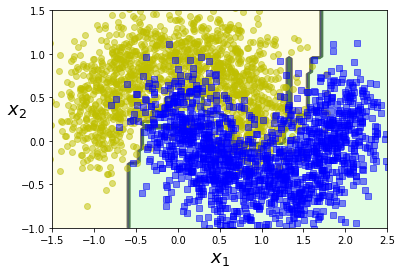

In [14]:
# plot the decision boundary
plot_decision_boundary(adaboost_grid, train_x.values, train_y.values)

Now let's use the fine-tuned model to make predictions on the test dataset and evaluate its performance in terms of accuracy and ROC AUC.

In [15]:
# TODO: make prediction and evaluate the model performance on test data
test_z = #TODO
test_z_prob = #TODO

model accuracy: 0.899
model ROC AUC: 0.959744


In [ ]:
print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))
print("model ROC AUC: {}".format(roc_auc_score(train_y, train_z_prob)))
print("model accuracy on test set: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))